In [1]:
'''
Today we will be looking at regression, probably the first thing you are taught in any machine 
learning course. The regression module is large, so we will divide it up into chunks. 
In this notebook we'll be looking at Linear Regression. 
'''

# first let's import the stuff 

import sealion as sl 
from sealion.regression import LinearRegression


In [2]:
# we'll use the Boston Housing Dataset for our Linear Regression algorithm. 
from sklearn.datasets import load_boston

In [3]:
X, y = load_boston()['data'], load_boston()['target'] # both are numpy arrays

In [4]:
"""
The first thing always to do is to look at your data. We can do this through the print function 
or through some visualization. 
"""

print(X) # standard print
print(X.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)


In [5]:
# now for y, our labels : 
print(y.shape)

(506,)


Text(0.5, 0.92, 'Boston Housing Dataset 3D PCA')

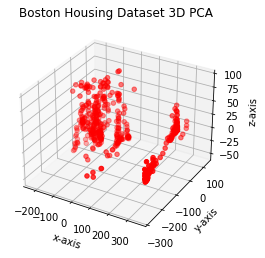

In [6]:
# for visualization, we can see our data in 3D using sealion's PCA algorithm
from sealion.DimensionalityReduction import PCA
import matplotlib.pyplot as plt 

pca = PCA(3) # set it up for 3D
X_3D = pca.transform(X) # transform it to 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3D[:, 0], X_3D[:, 1], X_3D[:, 2], c='red', marker='o')

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.title("Boston Housing Dataset 3D PCA")

In [7]:
# We see the dataset seems to be in 2 clusters. Just looking at the data you may be 
# wondering how a line can model this. Remember that dimensionality reduction has a tendency 
# to make more complex data lose its shape, so don't fret - Linear Regression will do 
# pretty well. 

# We should now split our dataset into its training and testing data and labels.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

In [8]:
# and let's simply apply linear regression here 
lin_reg = LinearRegression() # no arguments
lin_reg.fit(X_train, y_train)

In [9]:
# the way Linear Regression works is by using a closed-form normal equation or an iterative
# optimization algorithm called gradient descent. The former is usually much faster, so SeaLion
# uses it here. 

# to measure how well it did, let's use the r^2 value, usually from 0 - 1. More is better!
r_squared = lin_reg.evaluate(X_test, y_test) # will see the r^2 value of its predictions on X_test
# and y_test

print("R^2 : ", r_squared)

R^2 :  0.7022542449169196


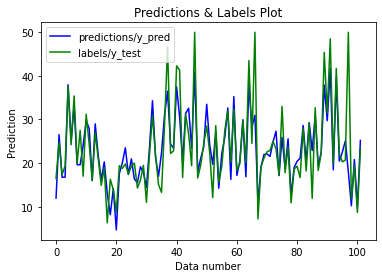

In [10]:
#Let's try to visualize it now. 
y_pred = lin_reg.predict(X_test) # get the predictions
lin_reg.visualize_evaluation(y_pred, y_test) # always feed in y_pred, then y_test
# the x-axis, data number, is just the indice for the data point

In [11]:
#That's all for today. Linear Regression is a stepping stone towards other things in ML, 
#so good luck on your journey. Feel free to check out more examples on github. 